In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [17]:
video_game_sales = pd.read_csv('/content/drive/MyDrive/Video Game Sales/vgsales.csv', index_col='Rank')

In [18]:
video_game_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
video_game_sales.shape

(16598, 10)

In [20]:
round(video_game_sales.describe(), 4)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.0000,16598.0000,16598.0000,16598.0000,16598.0000,16598.0000
mean,2006.4064,0.2647,0.1467,0.0778,0.0481,0.5374
std,5.8290,0.8167,0.5054,0.3093,0.1886,1.5550
min,1980.0000,0.0000,0.0000,0.0000,0.0000,0.0100
25%,2003.0000,0.0000,0.0000,0.0000,0.0000,0.0600
50%,2007.0000,0.0800,0.0200,0.0000,0.0100,0.1700
75%,2010.0000,0.2400,0.1100,0.0400,0.0400,0.4700
max,2020.0000,41.4900,29.0200,10.2200,10.5700,82.7400


In [21]:
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [22]:
def find_missing(df):
  missing_vals_df = pd.DataFrame(columns = ['Column', 'Length', 'Missing_Entries', 'Percentage_Missing'])
  for i, col in enumerate(df.columns, start=1):
    len_column = len(df[col])
    missing = df[col].isna().sum()
    missing_percentage = round(((missing / len_column) * 100), 2)
    holding_df = pd.DataFrame({'Column':col, 'Length':len_column, 'Missing_Entries':missing,
                               'Percentage_Missing':missing_percentage}, index=[i])

    missing_vals_df = pd.concat([missing_vals_df, holding_df])
    missing_vals_df = missing_vals_df.sort_values(by='Percentage_Missing', ascending=False)
  missing_vals_df = missing_vals_df[missing_vals_df['Missing_Entries'] > 0]
  return missing_vals_df



In [23]:
find_missing(video_game_sales)

,Column,Length,Missing_Entries,Percentage_Missing
3,Year,16598,271,1.63
5,Publisher,16598,58,0.35


In [24]:
video_game_sales[video_game_sales['Publisher'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43


In [25]:
video_game_sales.dropna(subset=['Publisher'], inplace=True)

In [26]:
find_missing(video_game_sales)

,Column,Length,Missing_Entries,Percentage_Missing
3,Year,16540,249,1.51


In [27]:
video_game_sales.dropna(subset=['Year'], inplace=True)

In [28]:
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [29]:
video_game_sales['Year'] = video_game_sales['Year'].astype('int64')

In [30]:
video_game_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


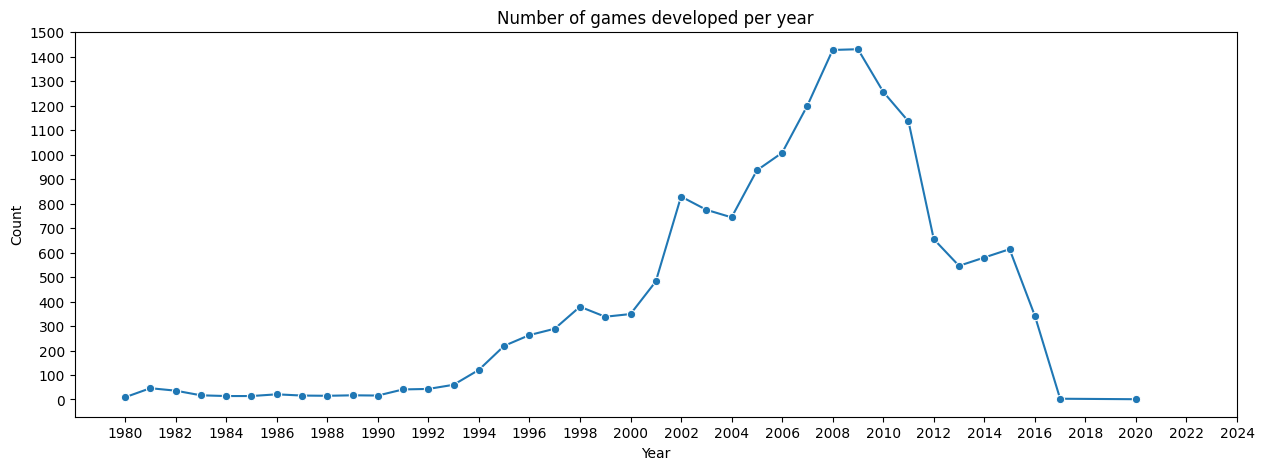

In [ ]:

game_count = video_game_sales['Year'].value_counts()

df = pd.DataFrame({'Year': game_count.index, 'Count': game_count.values}, index=range(len(game_count)))

plt.figure(figsize=(15,5))
sns.lineplot(x = df['Year'], y=df['Count'], marker='o')
plt.xticks(np.arange(1980, 2025, 2), [str(year) for year in range(1980, 2025, 2)])
plt.yticks(np.arange(0, 1600, 100))

plt.title('Number of games developed per year')
plt.show()
